In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv('u5mr_clean.csv')
df.head()

,CASEID,Respondents current age,Region,Type of place of residence,Highest educational level,Religion,Ethnicity,Number of household members (listed),Wealth index combined,"Type of cooking fuel (smoke exposure, indoor air pollution)",...,Place where most vaccinations were received_missing,Yellow fever vaccine_missing,Given child anything other than breast milk_missing,Visited health facility last 12 months_missing,Getting medical help for self: distance to health facility_missing,Mode of transportation to nearest healthcare facility_missing,Assistance: doctor_missing,Assistance: nurse/midwife/clinical officer_missing,Assistance: traditional birth attendant_missing,Assistance: Relative/friend_missing
0,1 4 2,34.0,1.0,1.0,0.0,7.0,11.0,6,4.0,2.0,...,0,1,0,0,0,0,0,0,0,0
1,1 13 2,39.0,1.0,1.0,2.0,1.0,3.0,8,5.0,2.0,...,1,1,1,0,0,0,1,1,1,1
2,1 26 2,28.0,1.0,1.0,2.0,3.0,3.0,5,4.0,2.0,...,1,1,1,0,0,0,1,1,1,1
3,1 42 1,30.0,1.0,1.0,2.0,4.0,3.0,3,5.0,2.0,...,1,1,1,1,1,1,1,1,1,1
4,1 55 2,34.0,1.0,1.0,2.0,2.0,3.0,4,5.0,2.0,...,0,1,1,1,1,1,0,0,0,0


## EXPLORATORY DATA ANALYSIS

We will proceed with exploratory data analysis, where we will explore the mortality figures in neonates, infants and children aged 1-5 using visualizations.

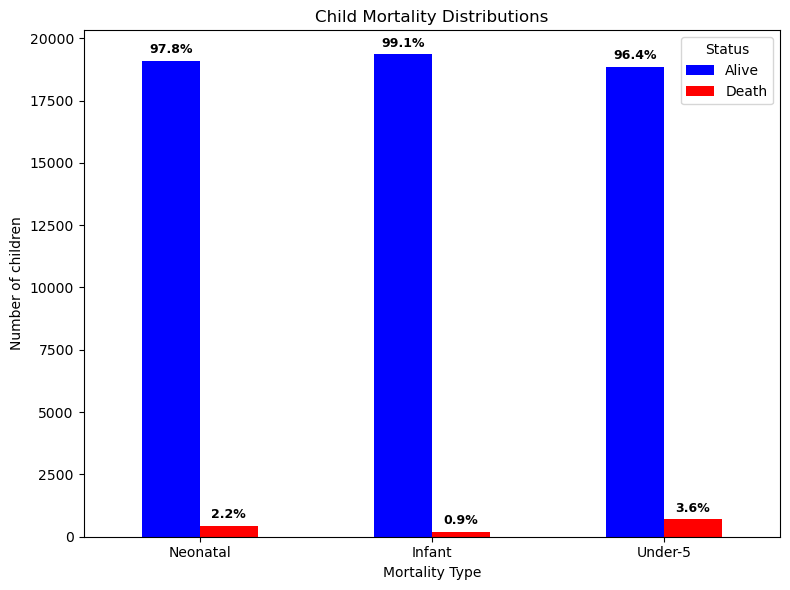

In [3]:
#Plot Child Mortality Distributions
# Prepare data
mortality_cols = {
    "neonatal_mortality": "Neonatal",
    "infant_mortality": "Infant",
    "under5_mortality": "Under-5"
}

counts = pd.DataFrame({
    label: df[col].value_counts().sort_index()
    for col, label in mortality_cols.items()
}).T

# Ensure Alive=0, Death=1 order
counts = counts[[0, 1]]
counts.columns = ["Alive", "Death"]

# Plot grouped bar chart
ax = counts.plot(
    kind="bar",
    stacked=False,
    color=["blue", "red"],
    figsize=(8, 6)
)

# Add percentage labels correctly using bar containers
for container in ax.containers:
    # Get group total per mortality type
    for bar in container:
        height = bar.get_height()
        if height > 0:
            # Total of the group (Alive+Death)
            total = counts.loc[bar.get_x() + bar.get_width()/2, :].sum() if False else None
        # Better way: use index position
    for i, bar in enumerate(container):
        height = bar.get_height()
        if height > 0:
            total = counts.iloc[i].sum()
            pct = height / total * 100
            ax.text(
                bar.get_x() + bar.get_width()/2,
                height + total * 0.01,
                f"{pct:.1f}%",
                ha='center', va='bottom',
                fontsize=9, fontweight="bold"
            )

plt.ylabel("Number of children")
plt.xlabel("Mortality Type")
plt.title("Child Mortality Distributions")
plt.xticks(rotation=0)
plt.legend(title="Status")
plt.tight_layout()
plt.show()

As can be seen in the bar chart above, the highest mortality rate is in the under 5 group, with a mortality rate of 3.6%, followed by neonates at 2.2% and 0.9% in the infants.

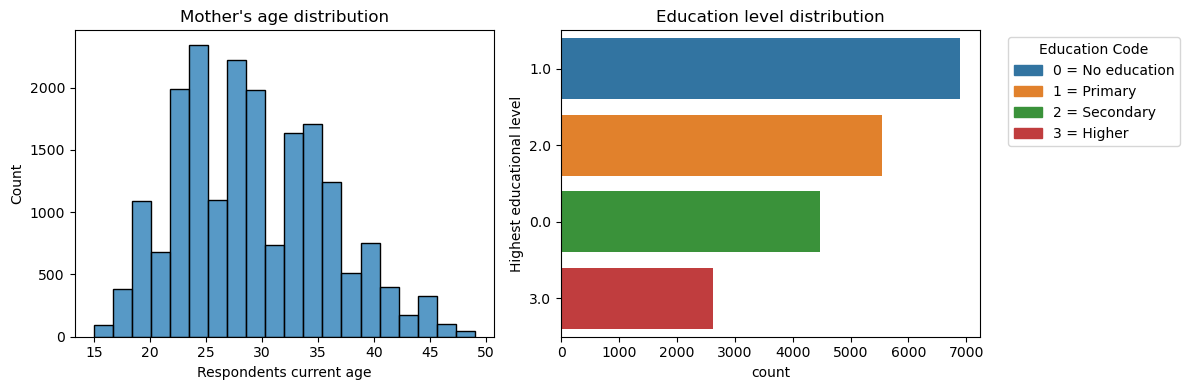

In [4]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Age distribution
sns.histplot(df['Respondents current age'], bins=20, ax=axes[0], kde=False)
axes[0].set_title("Mother's age distribution")

# Education distribution
order = df['Highest educational level'].value_counts().index
barplot = sns.countplot(
    y='Highest educational level',
    data=df,
    order=order,
    ax=axes[1]
)
axes[1].set_title("Education level distribution")


# Custom legend with actual bar colors
legend_labels = {
    0: "No education",
    1: "Primary",
    2: "Secondary",
    3: "Higher"
}

# Get bar colors from the plot
colors = [p.get_facecolor() for p in barplot.patches]

# Create patches with matching colors
patches = [
    mpatches.Patch(color=colors[i], label=f"{code} = {label}")
    for i, (code, label) in enumerate(legend_labels.items())
]

axes[1].legend(handles=patches, title="Education Code", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


The visualization on the left shows the distribution of ages of the respondents. Most respondents are located between ages 22-35.
On the right, most respondents (35.3%) have an education level of primary school, followed by secondary school(28.4%), then no education(22.9%) and lastly tertiary education(13.5%).

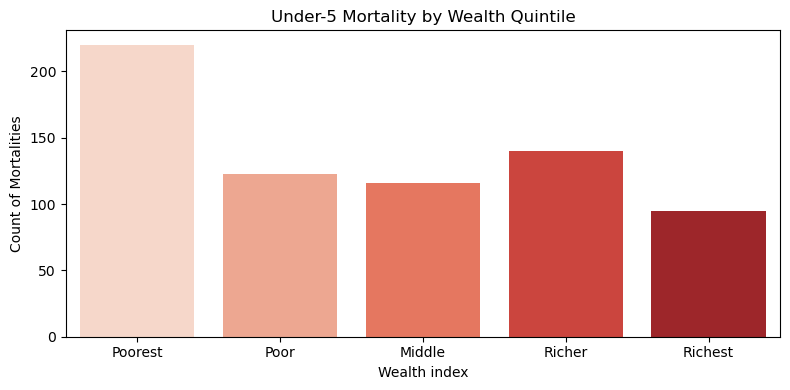

In [5]:
# Filter mortalities and make a safe copy
mortality_df = df[df['under5_mortality'] == 1].copy()

# Map numeric codes to readable labels
label_map = {1: "Poorest", 2: "Poor", 3: "Middle", 4: "Richer", 5: "Richest"}
mortality_df['Wealth_label'] = mortality_df['Wealth index combined'].map(label_map)

# Define desired order (so bars appear Poorest -> Richest)
order = [label_map[i] for i in sorted(label_map.keys())]

plt.figure(figsize=(8,4))
sns.countplot(x='Wealth_label', data=mortality_df, order=order, palette="Reds")
plt.title("Under-5 Mortality by Wealth Quintile")
plt.xlabel("Wealth index")
plt.ylabel("Count of Mortalities")
plt.tight_layout()
plt.show()


In the above chart, we can see that the highest mortality rate is in the 'poorest'(1) category, followed by the 'richer'(4) category, then the 'poor'(2) category, then the 'middle'(3) category and lastly the 'richest'(5) category. Interestingly enough, the 'richer'(4) category had the second-highest number of mortalities.

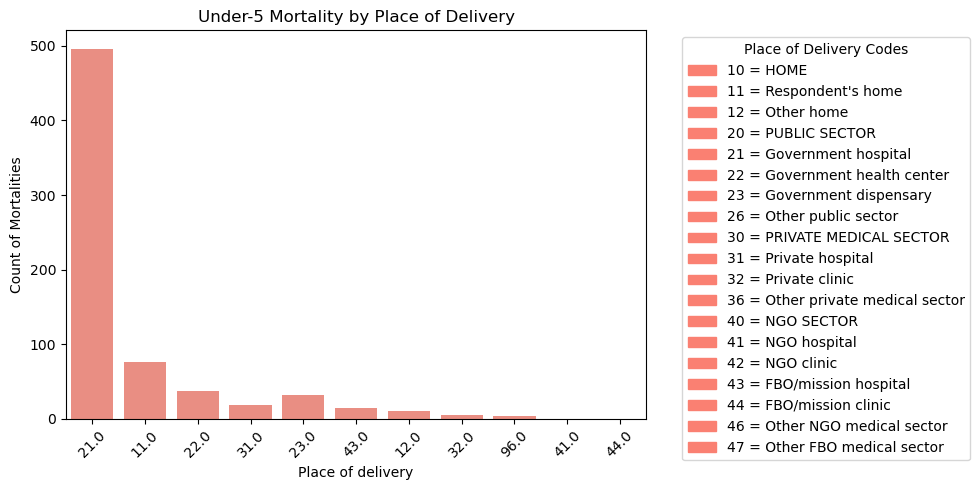

In [6]:
# Filter only mortalities
mortality_df = df[df['under5_mortality'] == 1].copy()

# Mapping of codes to labels
place_labels = {
    10: "HOME",
    11: "Respondent's home",
    12: "Other home",
    20: "PUBLIC SECTOR",
    21: "Government hospital",
    22: "Government health center",
    23: "Government dispensary",
    26: "Other public sector",
    30: "PRIVATE MEDICAL SECTOR",
    31: "Private hospital",
    32: "Private clinic",
    36: "Other private medical sector",
    40: "NGO SECTOR",
    41: "NGO hospital",
    42: "NGO clinic",
    43: "FBO/mission hospital",
    44: "FBO/mission clinic",
    46: "Other NGO medical sector",
    47: "Other FBO medical sector"
}

plt.figure(figsize=(10,5))
ax = sns.countplot(
    x='Place of delivery',
    data=mortality_df,
    order=df['Place of delivery'].value_counts().index,
    color="salmon"
)

plt.title("Under-5 Mortality by Place of Delivery")
plt.xticks(rotation=45)
plt.ylabel("Count of Mortalities")
plt.xlabel("Place of delivery")

# --- Build legend patches ---
patches = [
    mpatches.Patch(color="salmon", label=f"{code} = {label}")
    for code, label in place_labels.items()
]

plt.legend(
    handles=patches,
    title="Place of Delivery Codes",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


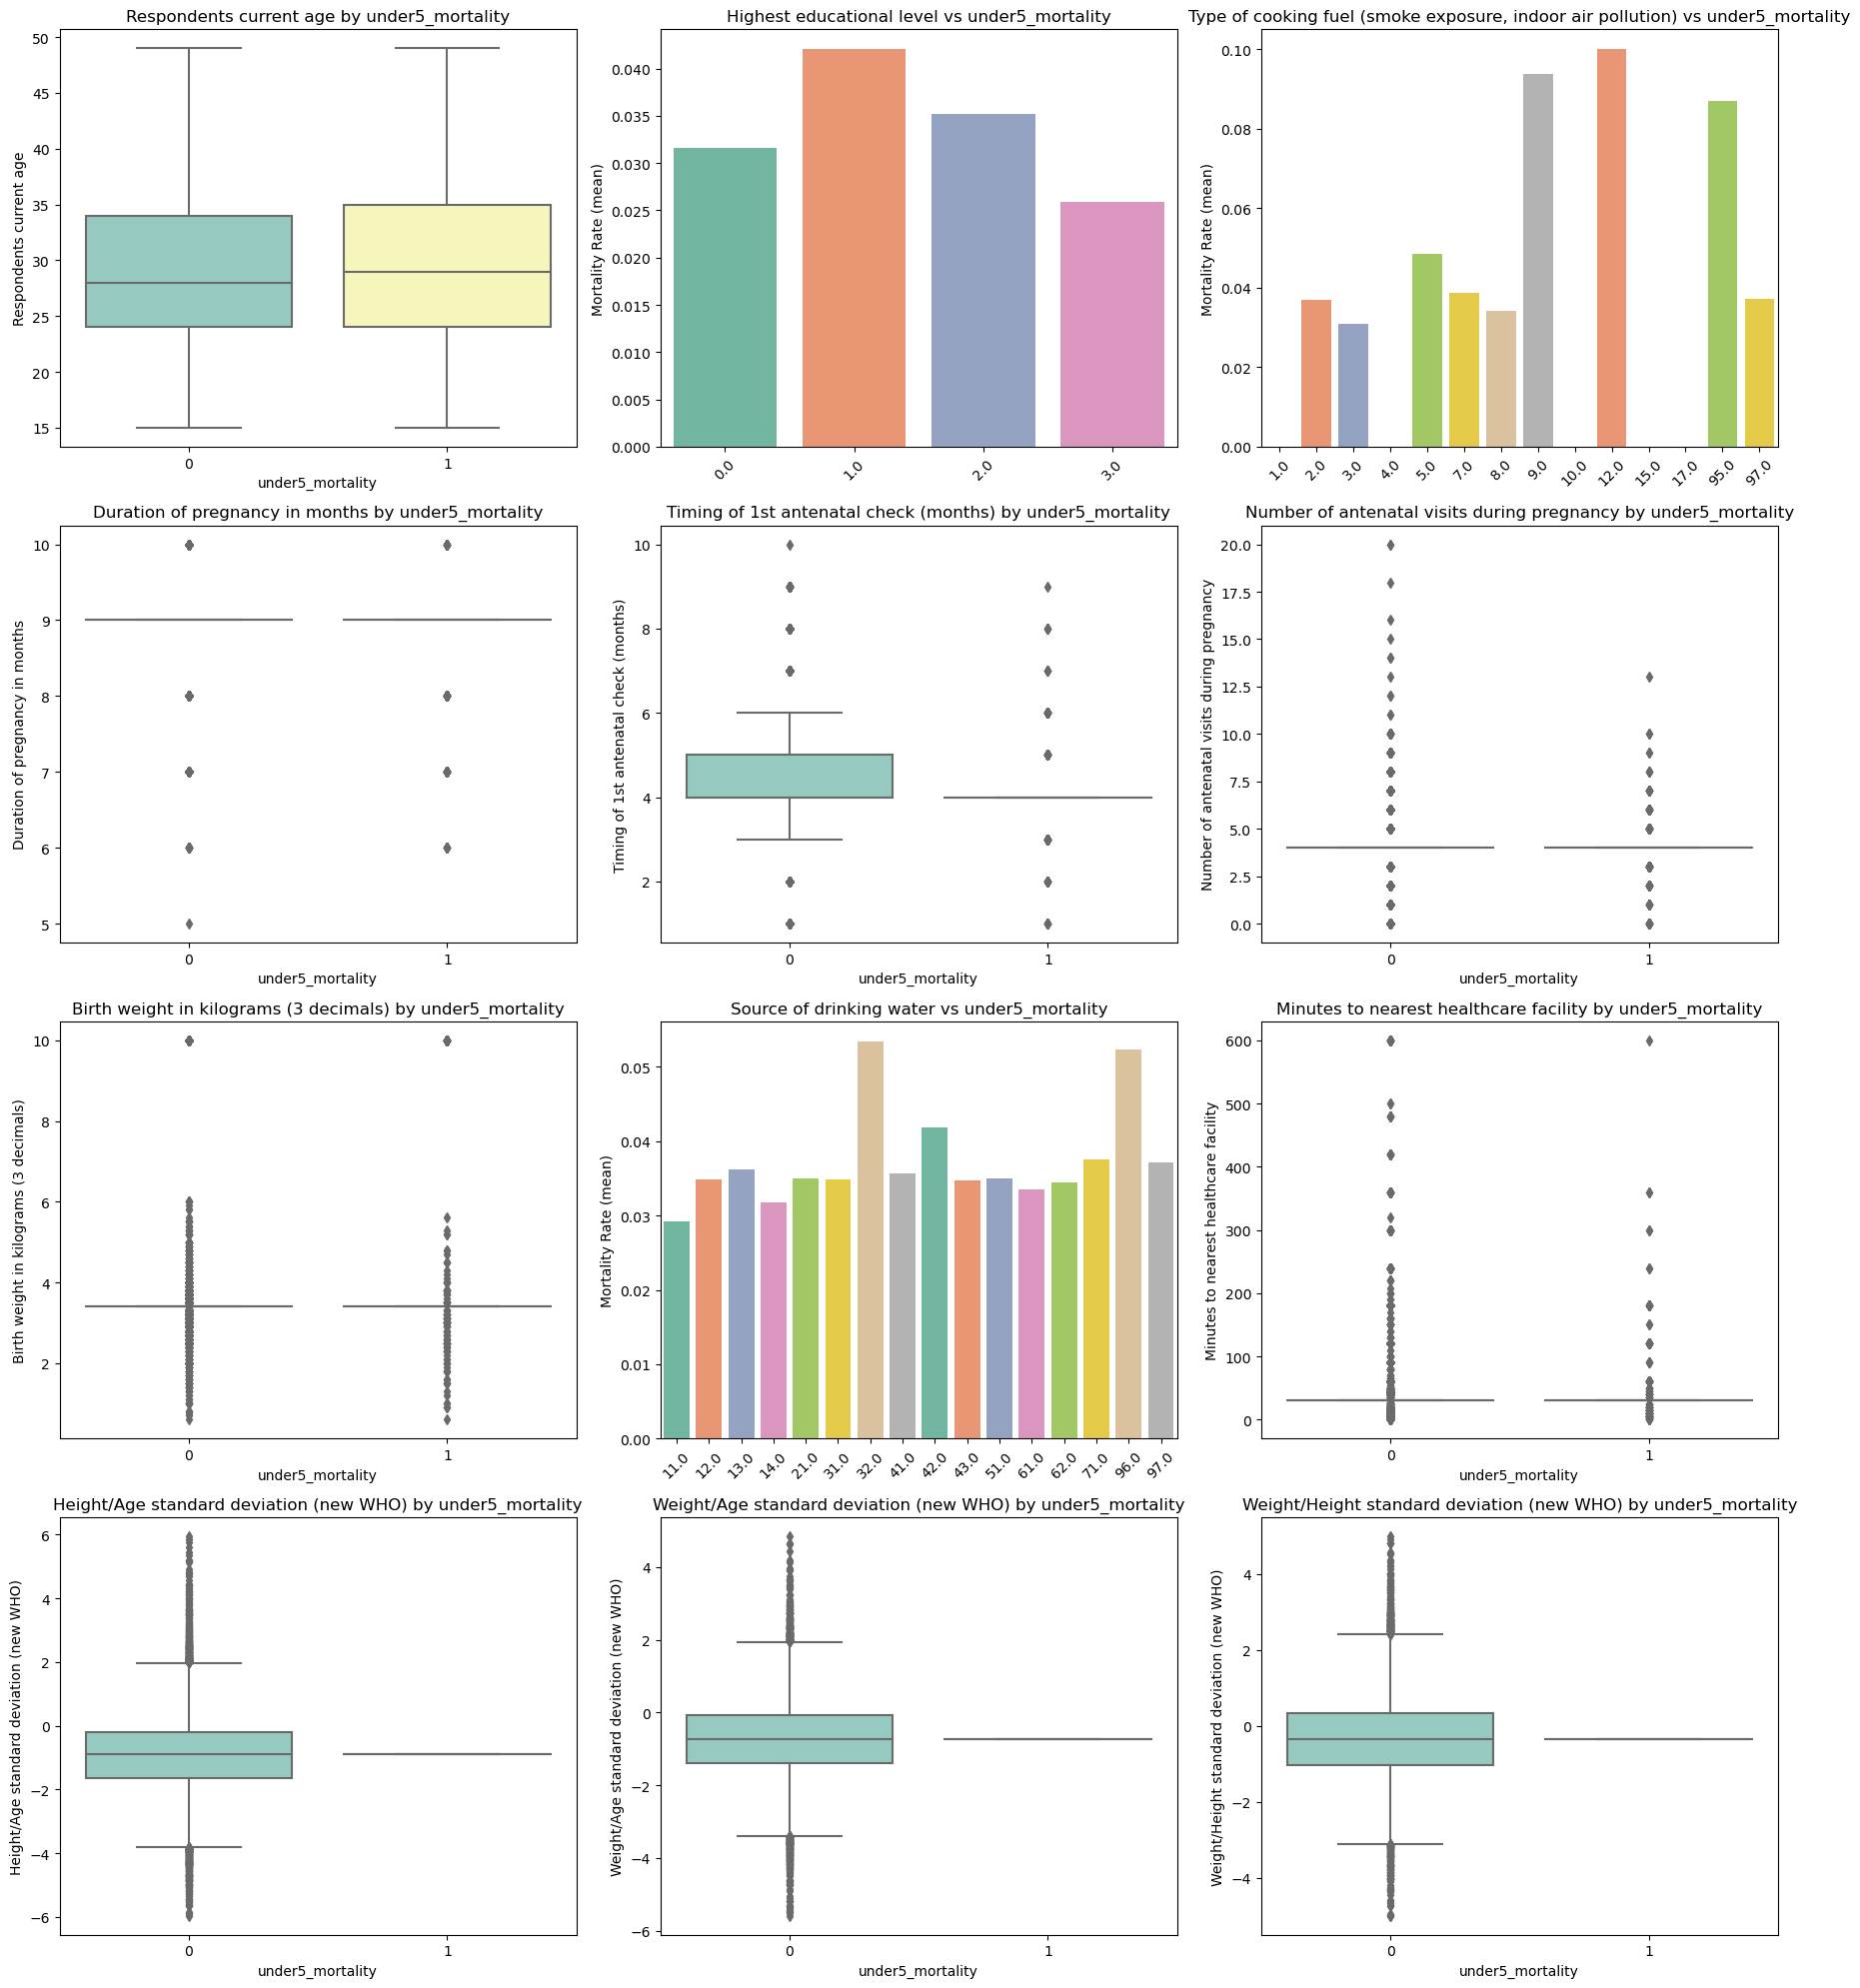

In [12]:

# Target variable
target = "under5_mortality"

# List of variables to analyze
vars_to_plot = [
    'Respondents current age',
    'Highest educational level',
    'Type of cooking fuel (smoke exposure, indoor air pollution)',
    'Duration of pregnancy in months',
    'Timing of 1st antenatal check (months)',
    'Number of antenatal visits during pregnancy',
    'Birth weight in kilograms (3 decimals)',
    'Source of drinking water',
    'Minutes to nearest healthcare facility',
    'Height/Age standard deviation (new WHO)',
    'Weight/Age standard deviation (new WHO)',
    'Weight/Height standard deviation (new WHO)'
]

# Identify categorical vs numeric
categorical_vars = [
    'Highest educational level',
    'Type of cooking fuel (smoke exposure, indoor air pollution)',
    'Ever had vaccination',
    'Source of drinking water'
]

numeric_vars = [v for v in vars_to_plot if v not in categorical_vars]

# Set up subplots
n = len(vars_to_plot)
rows = (n // 3) + (n % 3 > 0)   # 3 plots per row
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(vars_to_plot):
    ax = axes[i]
    
    if col in categorical_vars:
        # Show mortality rate (%) per category
        plot_data = (
            df.groupby(col)[target]
              .mean()
              .reset_index()
        )
        sns.barplot(data=plot_data, x=col, y=target, ax=ax, palette="Set2")
        ax.set_ylabel("Mortality Rate (mean)")
        ax.set_xlabel("")
        ax.set_title(f"{col} vs {target}")
        ax.tick_params(axis="x", rotation=45)
    
    else:  # numeric
        sns.boxplot(x=target, y=col, data=df, ax=ax, palette="Set3")
        ax.set_title(f"{col} by {target}")
    
# Remove any empty subplots if n not divisible by 3
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. Respondent’s Current Age vs Under-5 Mortality

The boxplots show that the distribution of maternal age doesn’t differ drastically between women who lost a child under 5 and those who did not.

Slight tendency: mothers of children who died appear somewhat younger on average, but overlap is high.

Interpretation: Maternal age alone may not be a strong predictor, though younger maternal age might contribute slightly to higher risk.

2. Highest Educational Level vs Under-5 Mortality

Mortality rates are lowest at higher education levels and higher at lower levels.

Interpretation: Education is protective. Mothers with secondary or higher education experience fewer under-5 deaths.

3. Type of Cooking Fuel (Smoke Exposure) vs Under-5 Mortality

Households using polluting fuels (like firewood, dung, kerosene) show higher under-5 mortality.

Cleaner fuels (like electricity, LPG, natural gas) are associated with lower mortality.

Interpretation: Indoor air pollution from cooking fuel increases risk of child mortality.

4. Duration of Pregnancy in Months vs Under-5 Mortality

Distribution looks almost identical between groups (those with and without under-5 mortality).

Interpretation: No clear pattern from this visualization. Could be because most pregnancies are 9 months, so limited variation.

5. Timing of 1st Antenatal Check (Months) vs Under-5 Mortality

Earlier ANC visits (lower values) appear slightly more common among mothers without child deaths.

Late ANC initiation is somewhat more common among those with under-5 deaths.

Interpretation: Early antenatal care may reduce under-5 mortality risk.

6. Number of Antenatal Visits vs Under-5 Mortality

Children of mothers with fewer ANC visits seem more likely to have died.

Higher ANC attendance is more common in the surviving group.

Interpretation: Adequate ANC visits are protective against under-5 mortality.

7. Birth Weight (kg) vs Under-5 Mortality

Children who died tend to have lower birth weights.

Survivors cluster around higher birth weights.

Interpretation: Low birth weight is strongly associated with under-5 mortality.

8. Ever Had Vaccination vs Under-5 Mortality

Mortality rate is higher among children who were never vaccinated.

Vaccinated children show lower mortality.

Interpretation: Immunization plays a strong protective role in child survival.

9. Duration of Breastfeeding vs Under-5 Mortality

Plot suggests that shorter breastfeeding duration is linked to higher mortality, though the relationship isn’t very clean.

Interpretation: Breastfeeding protects against under-5 mortality, especially prolonged breastfeeding.

10. Source of Drinking Water vs Under-5 Mortality

Safer/improved water sources correspond to lower mortality, while unimproved sources (surface water, unprotected wells) correspond to higher mortality.

Interpretation: Access to safe water reduces risk of child death (likely by reducing diarrheal disease).

11. Minutes to Nearest Healthcare Facility vs Under-5 Mortality

Children who died seem to come from households with longer travel times to healthcare facilities.

Interpretation: Poor access to health facilities increases under-5 mortality risk.

12. Height-for-Age Z-Score (HAZ) vs Under-5 Mortality

Children who died tend to have lower HAZ values (more negative, indicating stunting).

Interpretation: Stunting is associated with higher under-5 mortality.

13. Weight-for-Age Z-Score (WAZ) vs Under-5 Mortality

Lower WAZ (underweight children) are more common among those who died.

Interpretation: Underweight children face higher mortality risk.

14. Weight-for-Height Z-Score (WHZ) vs Under-5 Mortality

Children with lower WHZ (wasted children) are overrepresented in the mortality group.

Interpretation: Acute malnutrition (wasting) strongly increases risk of under-5 death.

Conclusion:

Protective determinants: higher maternal education, early ANC, more ANC visits, vaccination, breastfeeding, improved water, access to healthcare, adequate birth weight, better nutrition (HAZ, WAZ, WHZ).

Risk factors: polluting fuels, low maternal education, delayed ANC, low birth weight, poor nutrition, lack of vaccination, unsafe water, longer distance to health facilities.

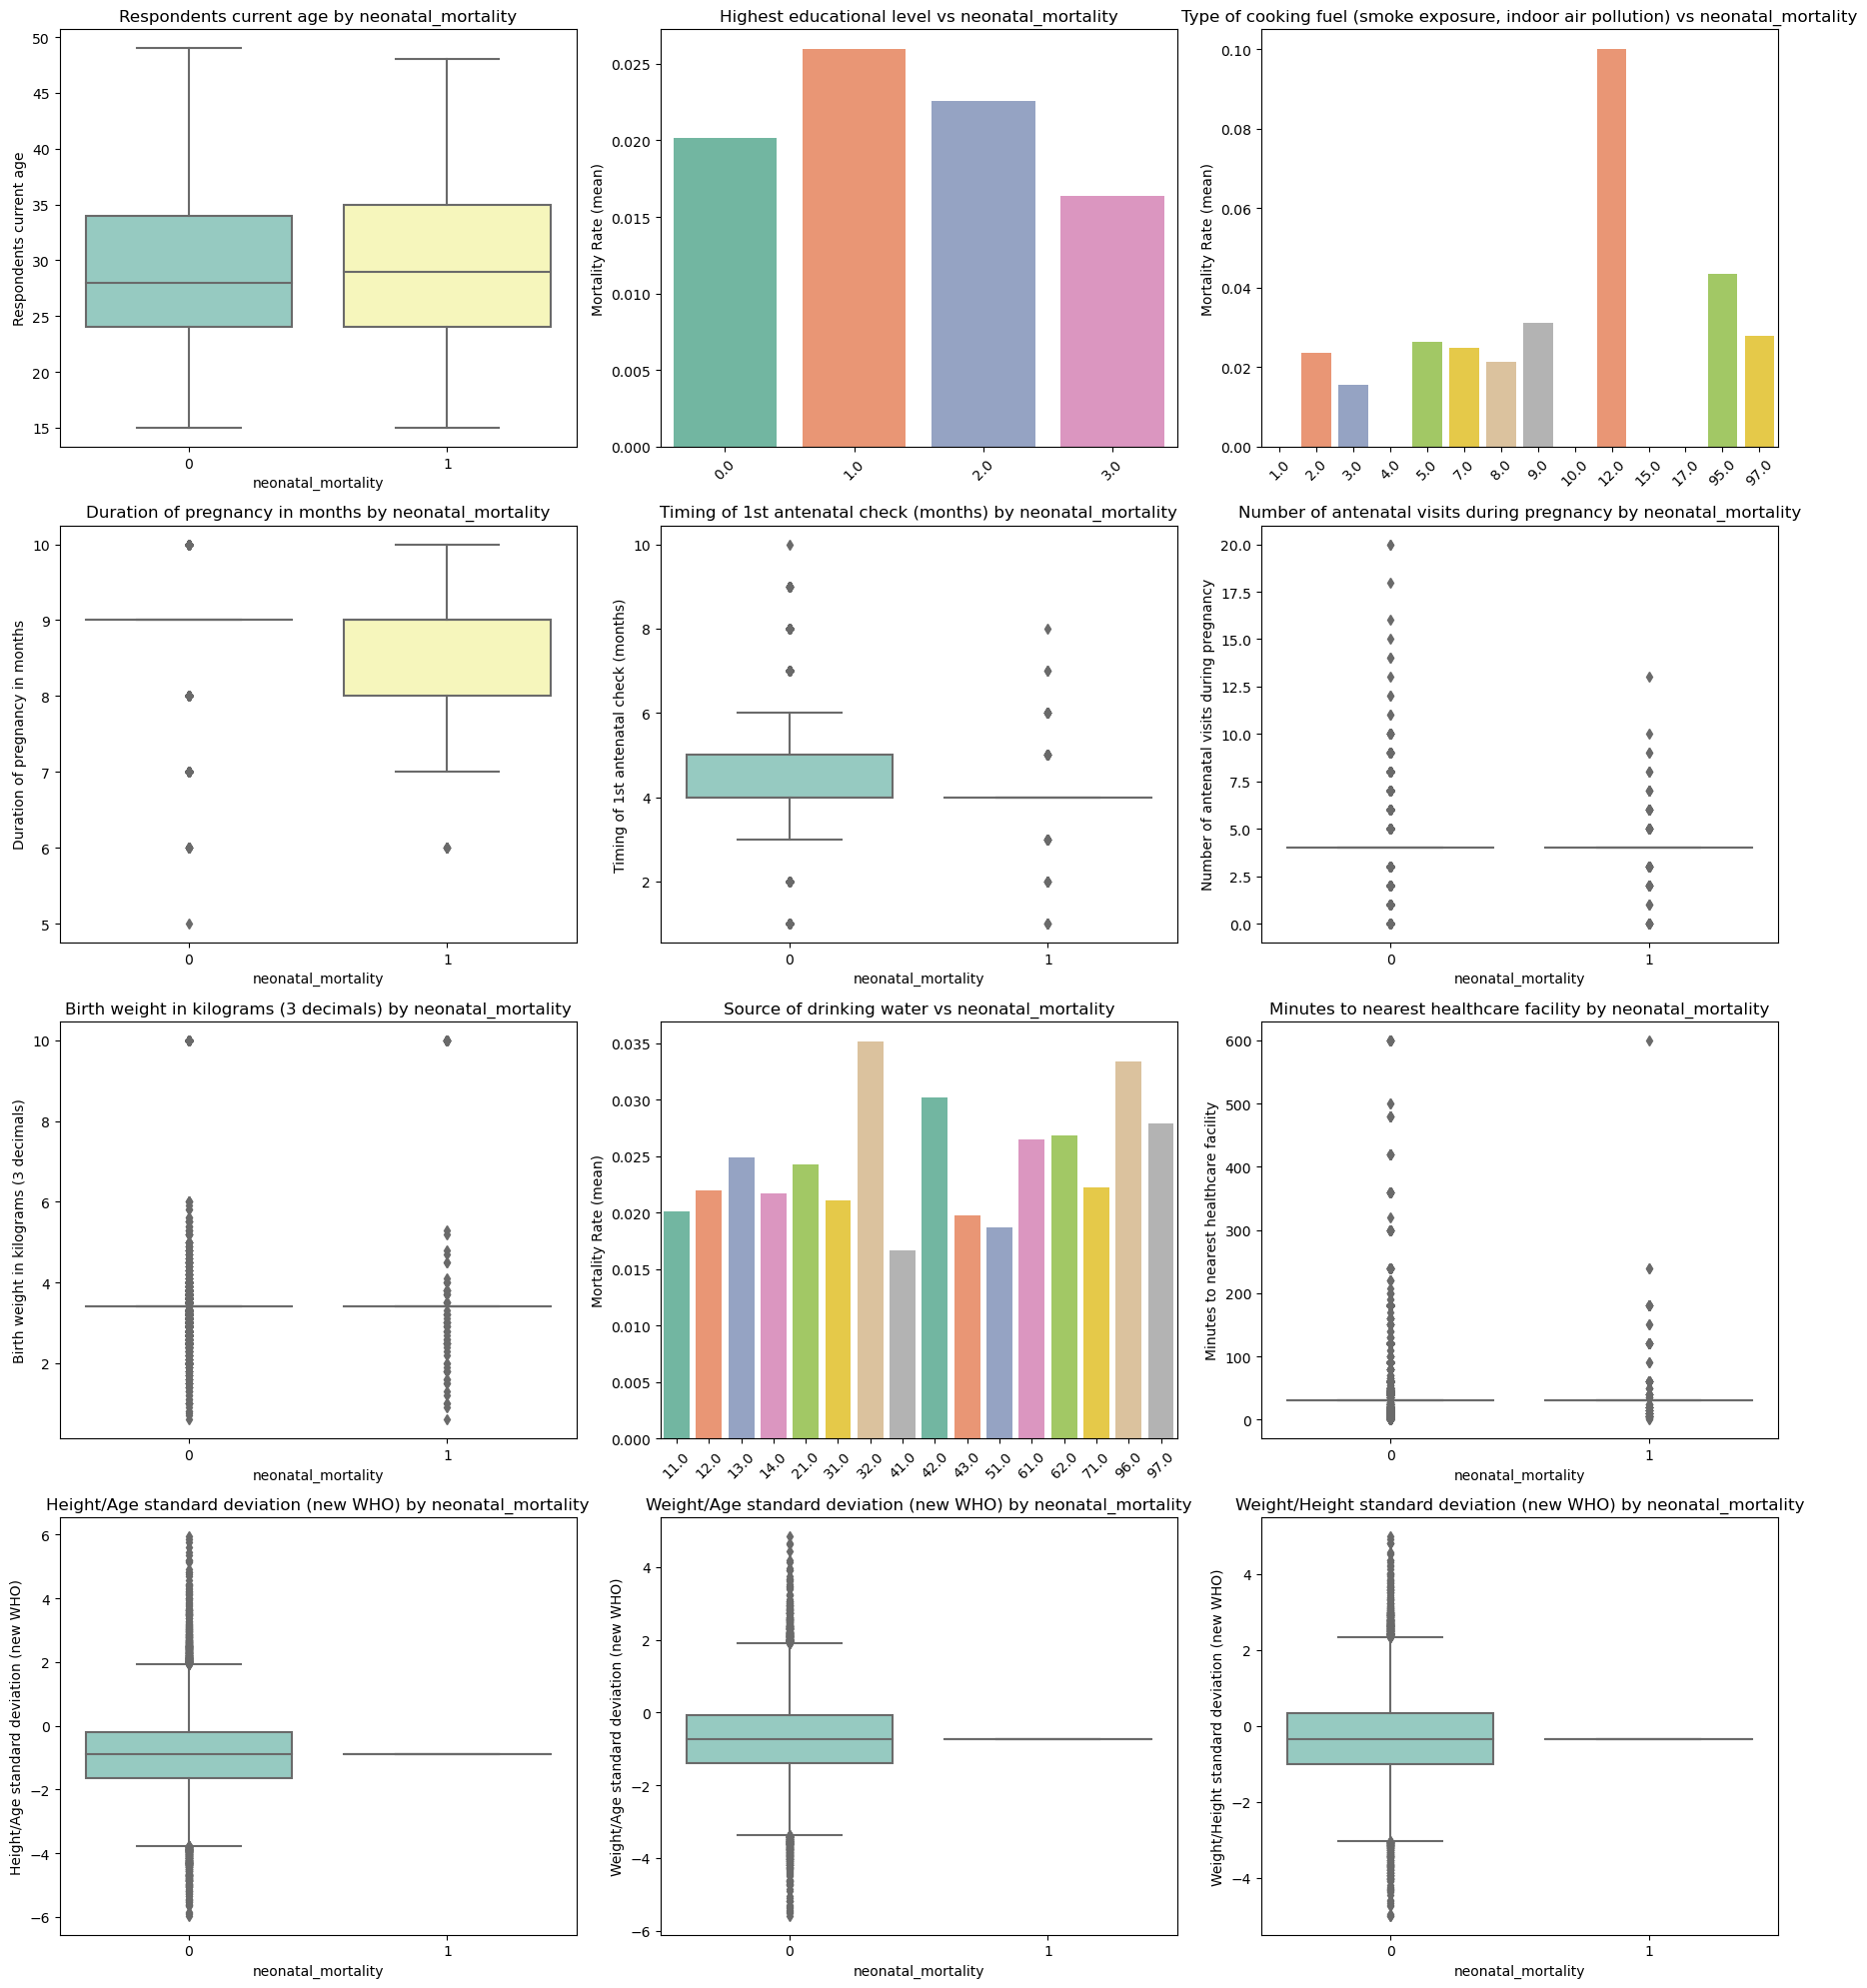

In [13]:
# Target variable
target = "neonatal_mortality"

# List of variables to analyze
vars_to_plot = [
    'Respondents current age',
    'Highest educational level',
    'Type of cooking fuel (smoke exposure, indoor air pollution)',
    'Duration of pregnancy in months',
    'Timing of 1st antenatal check (months)',
    'Number of antenatal visits during pregnancy',
    'Birth weight in kilograms (3 decimals)',
    'Source of drinking water',
    'Minutes to nearest healthcare facility',
    'Height/Age standard deviation (new WHO)',
    'Weight/Age standard deviation (new WHO)',
    'Weight/Height standard deviation (new WHO)'
]

# Identify categorical vs numeric
categorical_vars = [
    'Highest educational level',
    'Type of cooking fuel (smoke exposure, indoor air pollution)',
    'Ever had vaccination',
    'Source of drinking water'
]

numeric_vars = [v for v in vars_to_plot if v not in categorical_vars]

# Set up subplots
n = len(vars_to_plot)
rows = (n // 3) + (n % 3 > 0)   # 3 plots per row
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(vars_to_plot):
    ax = axes[i]
    
    if col in categorical_vars:
        # Show mortality rate (%) per category
        plot_data = (
            df.groupby(col)[target]
              .mean()
              .reset_index()
        )
        sns.barplot(data=plot_data, x=col, y=target, ax=ax, palette="Set2")
        ax.set_ylabel("Mortality Rate (mean)")
        ax.set_xlabel("")
        ax.set_title(f"{col} vs {target}")
        ax.tick_params(axis="x", rotation=45)
    
    else:  # numeric
        sns.boxplot(x=target, y=col, data=df, ax=ax, palette="Set3")
        ax.set_title(f"{col} by {target}")
    
# Remove any empty subplots if n not divisible by 3
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Comparison Between Neonatal and Under-5 Mortality

Respondent’s Current Age

Both neonatal and under-5 mortality show similar distributions across maternal age.

No strong visible difference between mothers of deceased vs. surviving children, though the median seems slightly younger in under-5 mortality.

Highest Educational Level

In both, higher education appears protective.

For neonatal mortality: mortality is highest in mothers with low education (0–1 levels).

For under-5 mortality: the difference is even more pronounced; mothers with little or no education see higher rates compared to those with secondary+.

Type of Cooking Fuel (Proxy for Indoor Air Pollution)

In both, polluting fuels (like wood/charcoal/kerosene) are associated with higher mortality.

For under-5 mortality, the association looks slightly stronger — meaning prolonged smoke exposure affects survival beyond the neonatal period.

Duration of Pregnancy

Neonatal mortality: preterm births (lower gestational months) are strongly linked to mortality.

Under-5 mortality: the association weakens, because prematurity is most dangerous right after birth.

Timing of 1st Antenatal Visit

Early ANC (first trimester) is protective in both cases.

Neonatal mortality shows a clearer benefit compared to under-5 mortality, since neonatal outcomes depend heavily on immediate perinatal care.

Number of Antenatal Visits

Both show a protective effect of higher ANC visits.

The effect is stronger for neonatal mortality (directly tied to pregnancy and delivery outcomes).

For under-5 mortality, the benefit is still visible but less pronounced.

Birth Weight

Low birth weight is very strongly associated with neonatal mortality (as expected).

For under-5 mortality, birth weight still matters but the effect weakens with age (other factors like infections and nutrition become more relevant).

Source of Drinking Water

In both cases, unimproved sources correlate with higher mortality.

The effect is stronger in under-5 mortality (likely due to diarrheal diseases and long-term exposure).

Minutes to Nearest Healthcare Facility

Distance to facility is associated with higher mortality in both, but:

Neonatal: critical for immediate delivery and emergencies.

Under-5: still relevant but mediated by other home/community health practices.

Anthropometric Indicators (WHO Z-scores)

Height-for-Age (stunting), Weight-for-Age (underweight), Weight-for-Height (wasting):

These are less relevant for neonatal mortality (since newborns are too young for chronic malnutrition to show).

For under-5 mortality, these indicators are much stronger — stunting, wasting, and underweight are major predictors of survival.

Conclusion

Neonatal mortality is driven more by pregnancy, delivery, and immediate newborn factors: gestational age, birth weight, ANC, maternal health, and access to care.

Under-5 mortality is influenced more by environmental and postnatal factors: water and sanitation, nutrition (stunting/wasting), prolonged exposure to indoor air pollution, and maternal education.

Maternal education and access to healthcare remain protective across both, but their relative importance shifts with the child’s age.

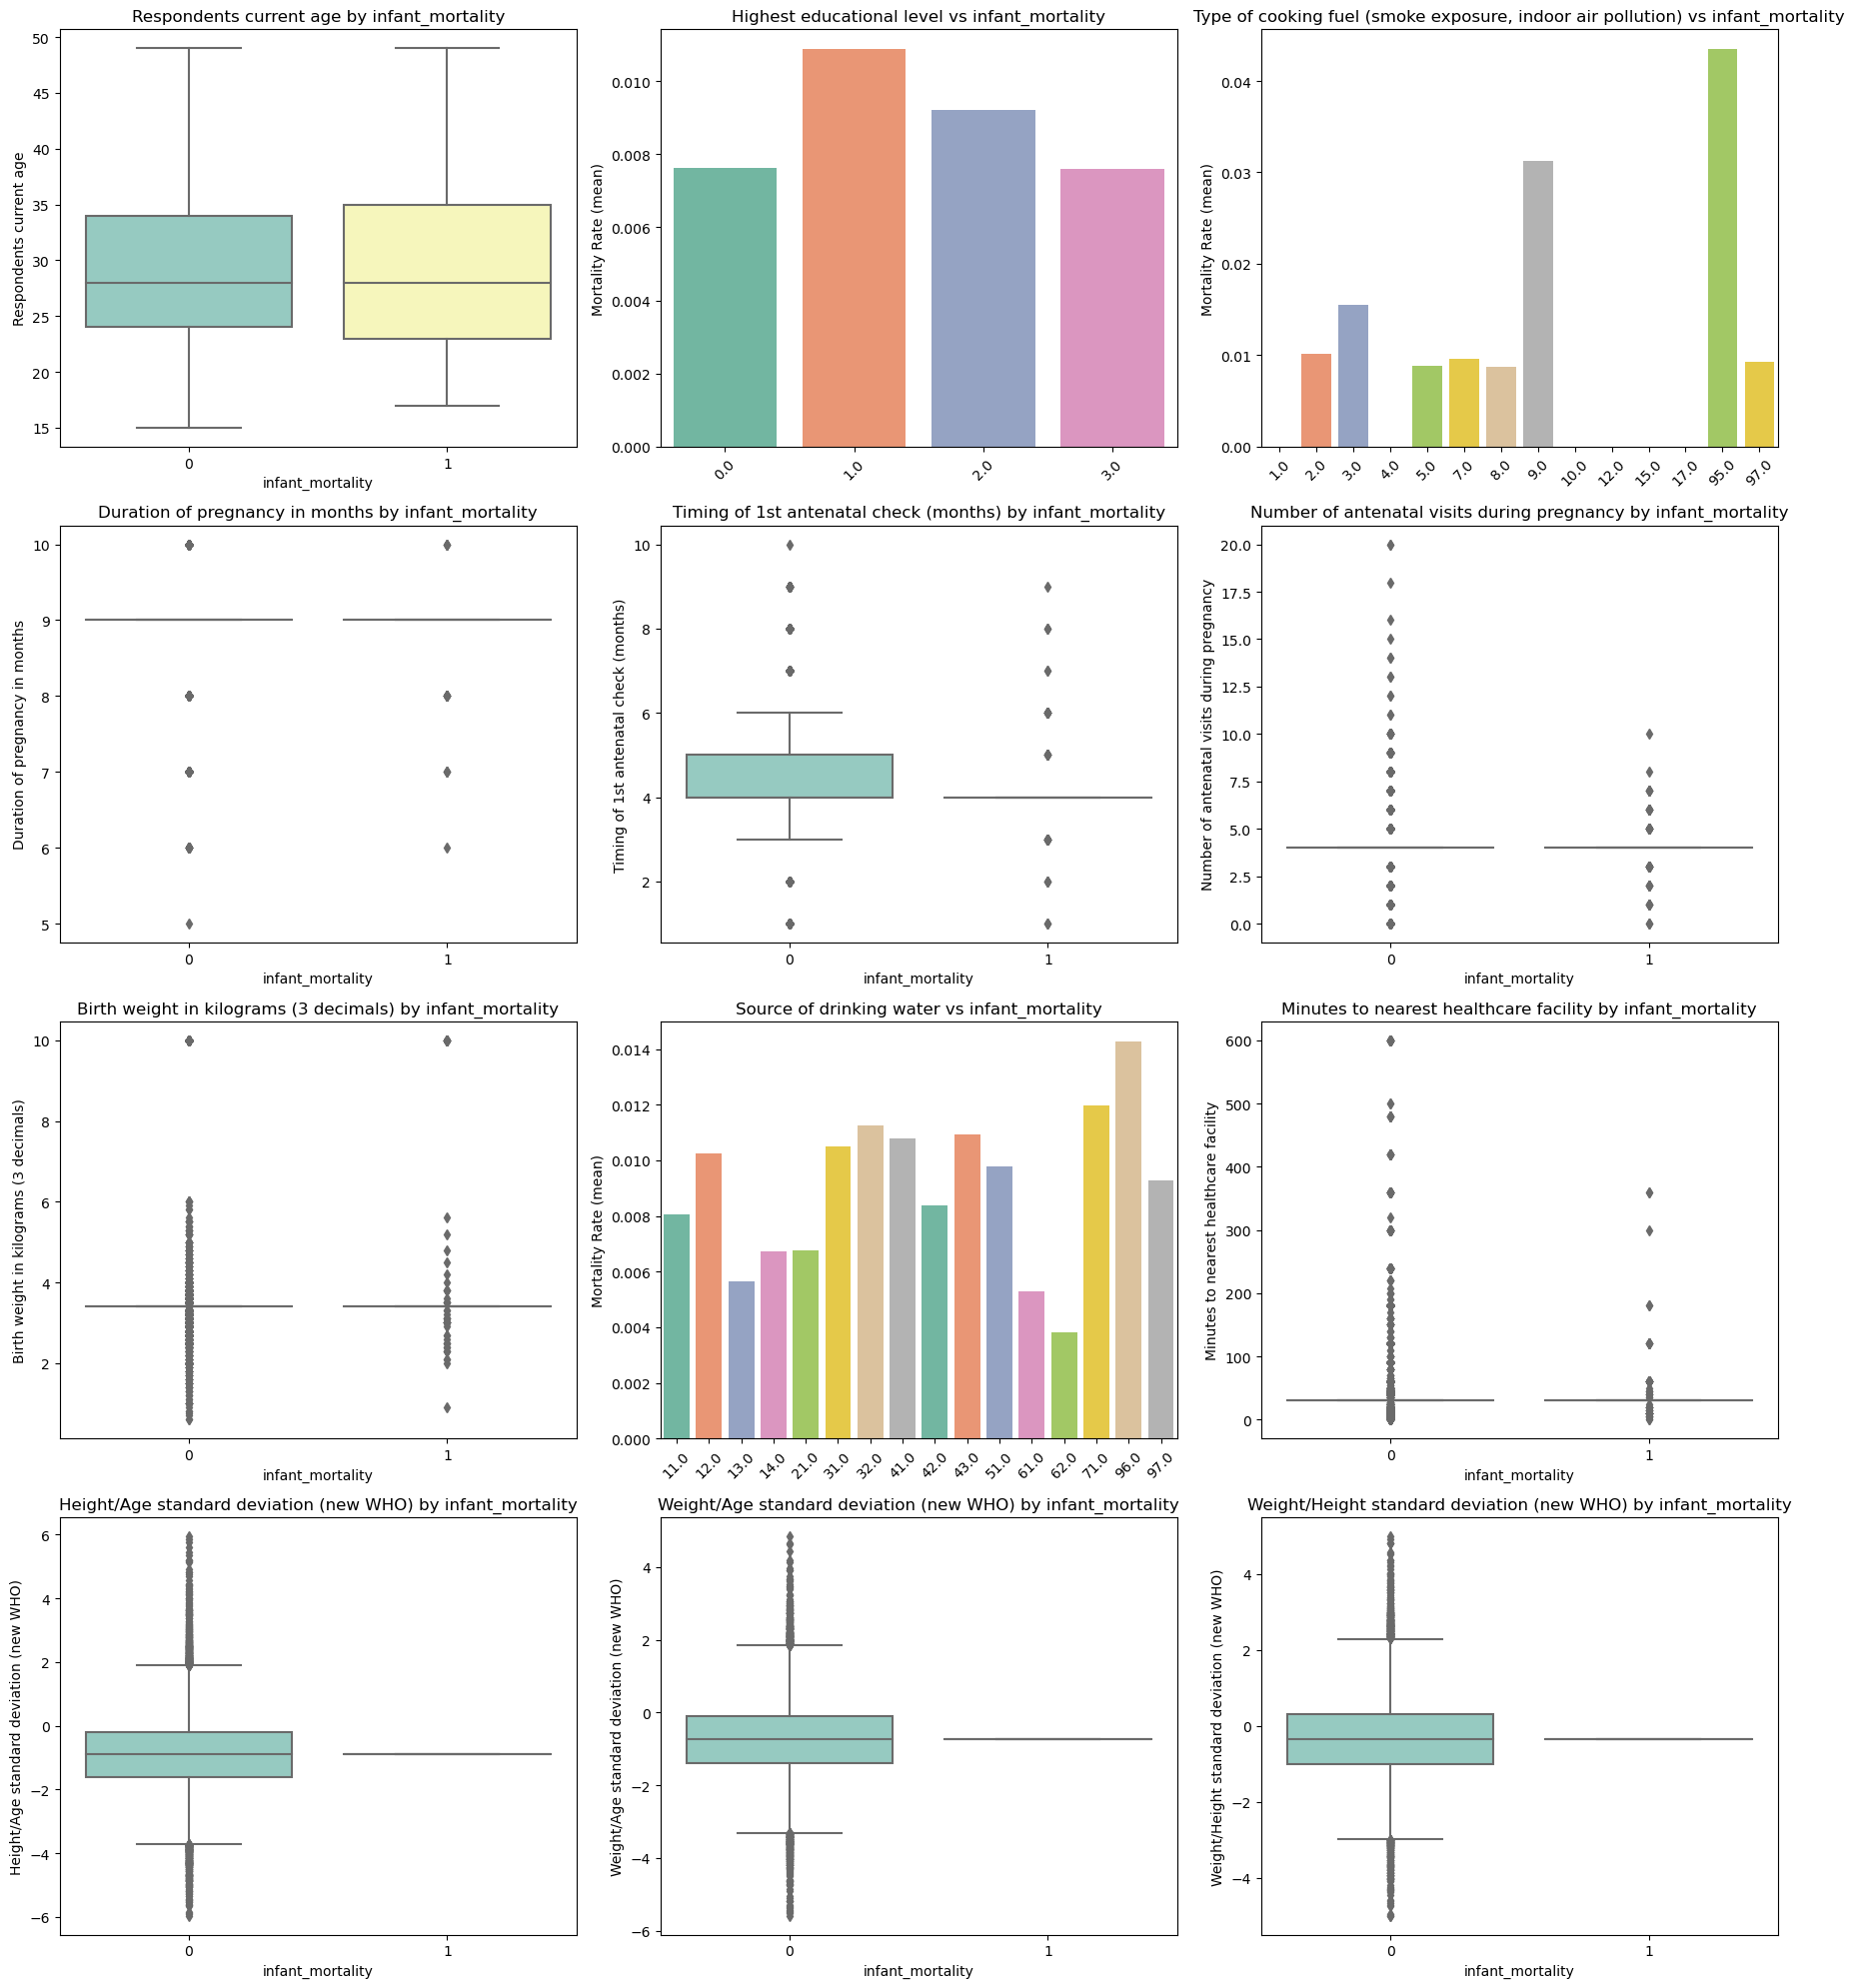

In [14]:
# Target variable
target = "infant_mortality"

# List of variables to analyze
vars_to_plot = [
    'Respondents current age',
    'Highest educational level',
    'Type of cooking fuel (smoke exposure, indoor air pollution)',
    'Duration of pregnancy in months',
    'Timing of 1st antenatal check (months)',
    'Number of antenatal visits during pregnancy',
    'Birth weight in kilograms (3 decimals)',
    'Source of drinking water',
    'Minutes to nearest healthcare facility',
    'Height/Age standard deviation (new WHO)',
    'Weight/Age standard deviation (new WHO)',
    'Weight/Height standard deviation (new WHO)'
]

# Identify categorical vs numeric
categorical_vars = [
    'Highest educational level',
    'Type of cooking fuel (smoke exposure, indoor air pollution)',
    'Ever had vaccination',
    'Source of drinking water'
]

numeric_vars = [v for v in vars_to_plot if v not in categorical_vars]

# Set up subplots
n = len(vars_to_plot)
rows = (n // 3) + (n % 3 > 0)   # 3 plots per row
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(vars_to_plot):
    ax = axes[i]
    
    if col in categorical_vars:
        # Show mortality rate (%) per category
        plot_data = (
            df.groupby(col)[target]
              .mean()
              .reset_index()
        )
        sns.barplot(data=plot_data, x=col, y=target, ax=ax, palette="Set2")
        ax.set_ylabel("Mortality Rate (mean)")
        ax.set_xlabel("")
        ax.set_title(f"{col} vs {target}")
        ax.tick_params(axis="x", rotation=45)
    
    else:  # numeric
        sns.boxplot(x=target, y=col, data=df, ax=ax, palette="Set3")
        ax.set_title(f"{col} by {target}")
    
# Remove any empty subplots if n not divisible by 3
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


| Variable                                   | Infant Mortality                                                              | Under-5 Mortality                                                                    |
| ------------------------------------------ | --------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------- |
| **Respondent’s current age**               | Similar median and spread; no strong separation between 0/1                             | Very similar distribution; slightly wider spread of ages                                           |
| **Highest educational level**              | Lower mortality overall; rates peak in some lower education categories but remain small | Higher mortality rates across all education groups; more pronounced differences between categories |
| **Type of cooking fuel**                   | Mortality rates low; one category shows higher risk (\~0.04)                            | Mortality rates higher; one category rises to \~0.10                                               |
| **Duration of pregnancy (months)**         | Distributions similar for survivors vs. deaths; mostly clustered at 9 months            | Same pattern, but deaths appear slightly more dispersed                                            |
| **Timing of 1st antenatal check (months)** | Median around 3–4 months; deaths show late checks in some cases                         | Very similar, though more variation among deaths                                                   |
| **Number of antenatal visits**             | Most between 0–10; deaths show slightly fewer visits but with overlap                   | Similar but mortality higher in groups with very low visits                                        |
| **Birth weight (kg)**                      | Median around 3 kg; deaths cluster at lower weights                                     | Same shape; higher mortality rates overall, especially at low weights                              |
| **Source of drinking water**               | Rates low (\~0.005–0.012); some variation across sources                                | Rates higher (\~0.02–0.05); clearer separation between safe vs unsafe sources                      |
| **Minutes to nearest health facility**     | Mostly low; some outliers above 300 minutes                                             | Similar shape; deaths include more cases with very long travel times                               |
| **Height/Age z-score**                     | Deaths skew slightly lower (more stunted children)                                      | Same pattern; stronger difference in distribution                                                  |
| **Weight/Age z-score**                     | Deaths skew lower (more underweight children)                                           | Stronger negative skew for deaths (higher under-5 mortality among underweight)                     |
| **Weight/Height z-score**                  | Slightly lower for deaths (wasting)                                                     | Same pattern, but more pronounced wasting in deaths                                                |

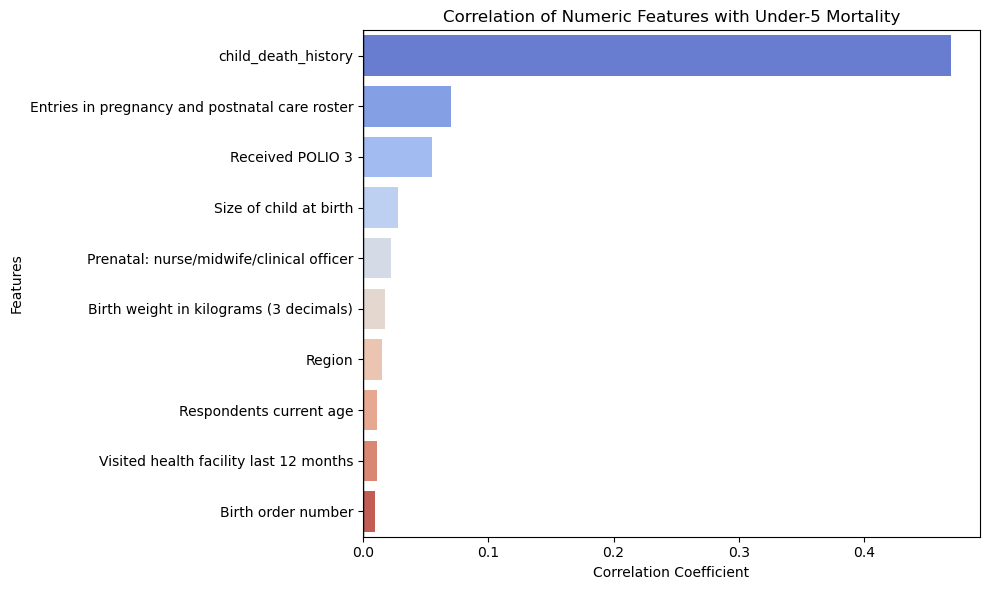

child_death_history                               0.468903
Entries in pregnancy and postnatal care roster    0.070483
Received POLIO 3                                  0.054854
Size of child at birth                            0.027976
Prenatal: nurse/midwife/clinical officer          0.022431
Birth weight in kilograms (3 decimals)            0.017712
Region                                            0.014845
Respondents current age                           0.010939
Visited health facility last 12 months            0.010851
Birth order number                                0.009594
Name: under5_mortality, dtype: float64


In [10]:


# --- Select numeric columns ---
numeric_cols = [
    c for c in df.select_dtypes(include=['float64','int64']).columns
    if not c.endswith('_missing')
    and c not in ['neonatal_mortality', 'infant_mortality']
]

# --- Compute correlation with under5_mortality only ---
corr_under5 = (
    df[numeric_cols]
    .corr()['under5_mortality']          # correlation of every numeric col with target
    .drop('under5_mortality')            # drop self-correlation
    .sort_values(ascending=False)        # sort descending
).head(10)

# --- Plot ---
plt.figure(figsize=(10,6))
sns.barplot(x=corr_under5.values, y=corr_under5.index, palette="coolwarm")
plt.title("Correlation of Numeric Features with Under-5 Mortality")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.axvline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

# Optional: print the correlations
print(corr_under5)